In [1]:
import numpy as np
import pandas as pd

#CMU pronunciation (phoneme) dictionary
import cmudict

#Natural Language Toolkit
import nltk
from nltk import word_tokenize


[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/msiegelman/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


True

Read the glove vectors from a txt file into a dictionary. This will take ~20 seconds

In [2]:
df = pd.read_csv('glove.6B.300d.txt', sep=" ", quoting=3, header=None, index_col=0)
glove_vecs = {key: val.values for key, val in df.T.items()}

To speed things up, filter the vectors to only include words with lexical frequency > 1.5

In [3]:
#read excel file
subtlex = pd.read_excel('SUBTLEX.xlsx')
#get wordlist column
subtlex_wordlist=list(subtlex['Word'])
#get Log10 word frequency column
freqs=np.array(subtlex['Lg10WF'])
#set word frequency dict
word_freqs=dict(zip(subtlex_wordlist,freqs))

#filter words
keep_words=[word for word in glove_vecs if word in word_freqs and word_freqs[word]>1.5]

#reset glove_vecs
glove_vecs2=dict()
for word in keep_words:
    glove_vecs2[word]=glove_vecs[word]

glove_vecs=glove_vecs2

Check out a glove vector

In [39]:
print(glove_vecs['spooky'])

[-0.53547   -0.32264   -0.17787    0.48639    0.27576    0.19807
  0.21415    0.31027    0.074413   0.29251    0.13952   -0.49556
  0.20858    0.32588   -0.15456    0.072814  -0.51364   -0.052127
 -0.12339    0.71907    0.60091    0.52926   -0.088118   0.18841
  0.32419    0.19187    0.21641   -0.57295   -0.36778    0.47204
 -0.53247   -0.059267  -0.34259   -0.23663    0.45971    0.63399
  0.305     -0.047307  -0.11934    0.21428    0.24365    0.27407
 -0.16237   -0.11816    0.026294  -0.039055   0.28232   -0.3402
  0.27778   -0.13872    0.3879    -0.32425    0.17823    0.21853
  0.3355    -0.32663    0.24301    0.46365    0.42917   -0.199
  0.25955   -0.079685   0.41002    0.1351     0.30229   -0.012149
  0.2271    -0.05333    0.77158   -0.25852   -0.29968    0.30693
 -0.058419  -0.1666     0.091203  -0.30427    0.1801     0.48554
  0.24405   -0.39042   -0.022245   0.007868   0.50216   -0.10949
  0.18704    0.30813    0.3518     0.39229    0.31233   -0.060502
 -0.07049    0.12552    0

Find semantic neighbors with correlations

In [4]:
w1='spooky'
vec1=glove_vecs[w1]

corrs=[]
for word in glove_vecs:
    corr=np.corrcoef(vec1,glove_vecs[word])[0][1]
    corrs.append(corr)

#find top 10 neighbors
print([keep_words[i] for i in np.argsort(corrs)[::-1][:10]])

['spooky', 'creepy', 'scary', 'weird', 'eerie', 'haunted', 'surreal', 'funky', 'dreamy', 'haunting']


Visualize vectors as 2D coordinates with UMAP

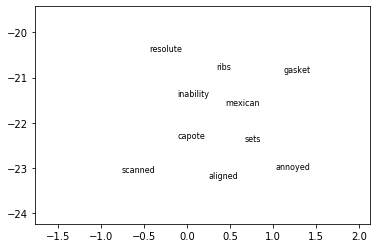

In [36]:
import random
import umap
import matplotlib.pyplot as plt

random.shuffle(keep_words)

randvecs=[glove_vecs[w] for w in keep_words[:10]]

randvecs2d = umap.UMAP(n_neighbors=3,
                      min_dist=.1,
                      metric='euclidean').fit_transform(randvecs)

#plot each word based on 2d coordinates
for ind,coords in enumerate(randvecs2d):

    word=keep_words[ind]
    
    x=coords[0]
    y=coords[1]

    plt.text(x,y,word,fontsize=8)

#set x and y limits
plt.xlim(np.min([v[0] for v in randvecs2d])-1,np.max([v[0] for v in randvecs2d])+1)
plt.ylim(np.min([v[1] for v in randvecs2d])-1,np.max([v[1] for v in randvecs2d])+1)

plt.show()

     |████████████████████████████████| 71.1MB 233kB/s eta 0:00:013
  Using cached https://files.pythonhosted.org/packages/a3/b7/d3d18008a67e0b968d1ab93ad444fc05699403fa662f634b2f2c318a508b/pytorch_transformers-1.2.0-py3-none-any.whl
     |████████████████████████████████| 133kB 12.9MB/s eta 0:00:01
     |████████████████████████████████| 860kB 12.1MB/s eta 0:00:01
     |████████████████████████████████| 1.1MB 13.7MB/s eta 0:00:01
     |████████████████████████████████| 655kB 19.6MB/s eta 0:00:01
     |████████████████████████████████| 5.3MB 2.9MB/s eta 0:00:011
     |████████████████████████████████| 71kB 22.5MB/s eta 0:00:01
  Stored in directory: /Users/msiegelman/Library/Caches/pip/wheels/63/2a/db/63e2909042c634ef551d0d9ac825b2b0b32dede4a6d87ddc94
  Stored in directory: /Users/msiegelman/Library/Caches/pip/wheels/90/04/07/b5010fb816721eb3d6dd64ed5cc8111ca23f97fdab8619b5be
Successfully built sacremoses regex
Note: you may need to restart the kernel to use updated packages.
